In [2]:
!pip install pandas numpy matplotlib seaborn scipy plotly

Defaulting to user installation because normal site-packages is not writeable


## EDA General

In [3]:
# Importar bibliotecas necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import plotly.express as px
# Leer el archivo CSV
df = pd.read_csv('../data/processed/AQ_total.csv')

### 1. Preparación de datos:
   - Definir formato de fecha y hora
   - Información básica del dataset

In [4]:
# Convertir la columna TimeStamp al formato datetime
df['TimeStamp'] = pd.to_datetime(df['TimeStamp'])

# Verificar el formato convertido
print(df['TimeStamp'].head())


0   2022-12-07 10:28:22
1   2022-12-07 10:32:58
2   2022-12-07 10:38:02
3   2022-12-07 10:43:00
4   2022-12-07 10:47:59
Name: TimeStamp, dtype: datetime64[ns]


### 2. Análisis estadístico:
   - Estadísticas descriptivas
   - Identificación de valores nulos

In [5]:
# 2. Información básica del dataset
print("=== Información básica del dataset ===")
print(df.info())
print("\n=== Primeras 5 filas ===")
print(df.head())

=== Información básica del dataset ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210255 entries, 0 to 210254
Data columns (total 10 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   Battery            210255 non-null  int64         
 1   Carbon Monoxide    210214 non-null  float64       
 2   Relative Humidity  210255 non-null  float64       
 3   Location           210255 non-null  object        
 4   Ozone              210255 non-null  int64         
 5   PM10               210255 non-null  int64         
 6   PM2.5              210255 non-null  int64         
 7   Temperature        210255 non-null  float64       
 8   Device Mode        210255 non-null  int64         
 9   TimeStamp          210255 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(3), int64(5), object(1)
memory usage: 16.0+ MB
None

=== Primeras 5 filas ===
   Battery  Carbon Monoxide  Relative Humidity              Locat

### 3. Análisis temporal:
   - Gráficos de series temporales para cada variable
   - Patrones temporales




=== Estadísticas descriptivas ===
             Battery  Carbon Monoxide  Relative Humidity          Ozone  \
count  210255.000000    210214.000000      210255.000000  210255.000000   
mean       97.690015       302.303500          50.331561      38.616375   
min        60.000000         0.000000           0.000000       0.000000   
25%        97.000000       262.000000          29.330000      29.000000   
50%        98.000000       287.000000          45.870000      35.000000   
75%        98.000000       324.000000          66.970000      44.000000   
max       102.000000      8110.000000          99.900000     375.000000   
std         0.991245        76.621712          26.492641      15.409177   

                PM10         PM2.5    Temperature    Device Mode  \
count  210255.000000  2.102550e+05  210255.000000  210255.000000   
mean       18.161490  2.855099e+04      21.418228       0.000162   
min         1.000000  0.000000e+00       0.000000       0.000000   
25%         4.000

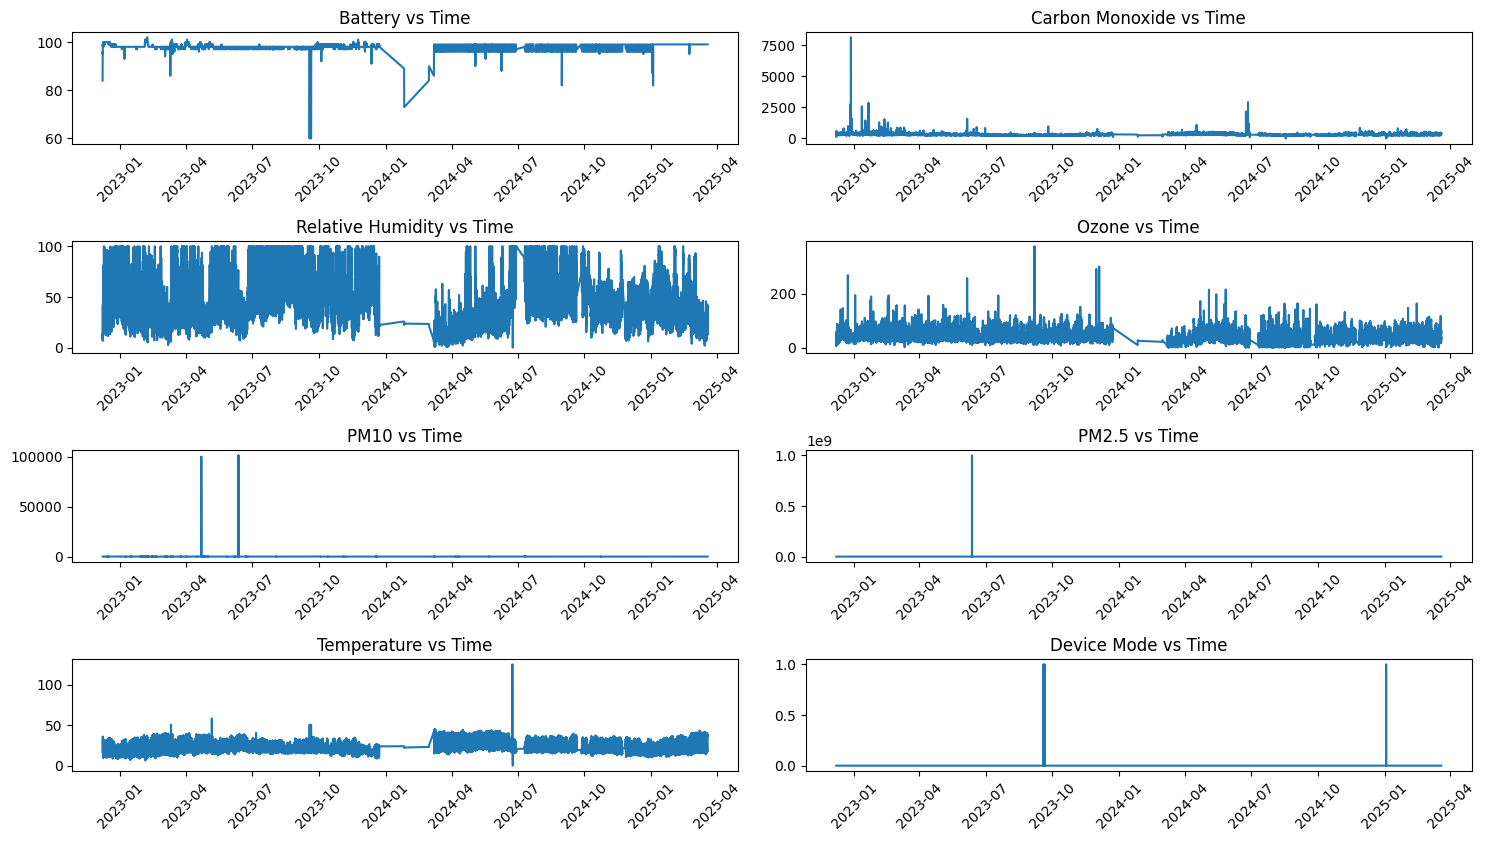

In [6]:
# 3. Estadísticas descriptivas
print("\n=== Estadísticas descriptivas ===")
print(df.describe())

# Análisis temporal
# Crear gráficos de series temporales para cada variable numérica
numeric_columns = df.select_dtypes(include=[np.number]).columns

plt.figure(figsize=(15, 10))
for i, col in enumerate(numeric_columns, 1):
    if col not in ['date', 'time']:
        plt.subplot(len(numeric_columns)//2 + 1, 2, i)
        plt.plot(df['TimeStamp'], df[col])
        plt.title(f'{col} vs Time')
        plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### 4. Correlaciones:
   - Matriz de correlación entre variables numéricas



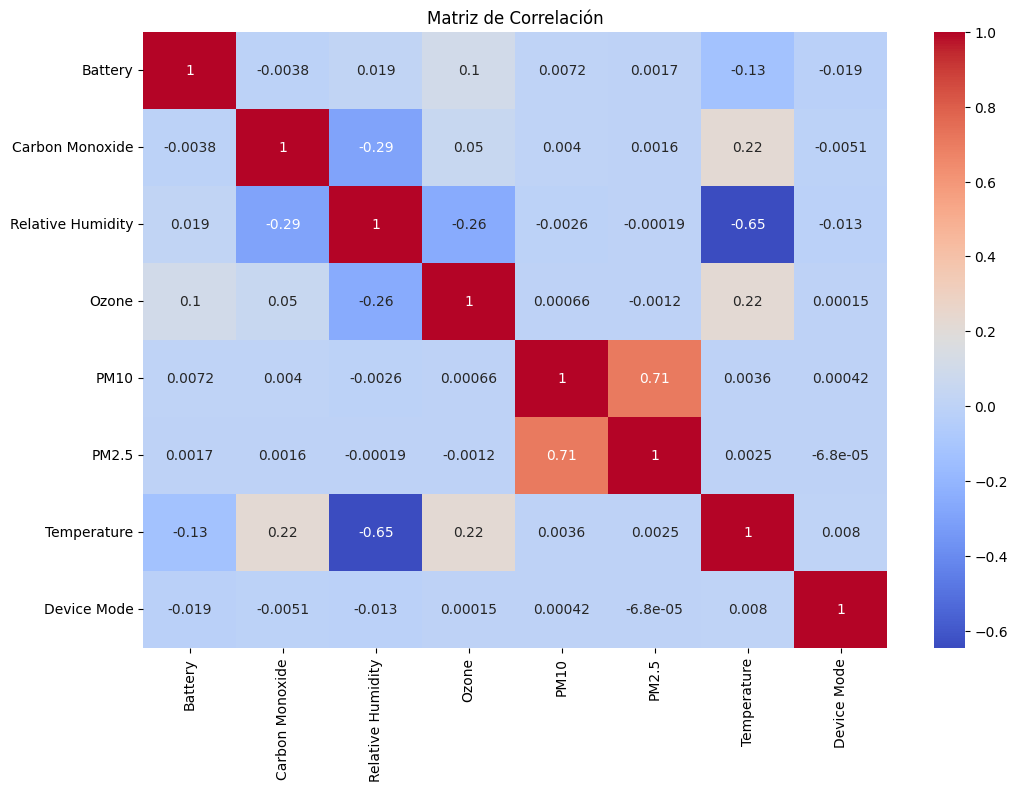

In [7]:
# Análisis de correlación
plt.figure(figsize=(12, 8))
sns.heatmap(df.select_dtypes(include=[np.number]).corr(), annot=True, cmap='coolwarm')
plt.title('Matriz de Correlación')
plt.show()


### 5. Análisis por tiempo
   - Comportamiento de variables
   - Patrones diarios



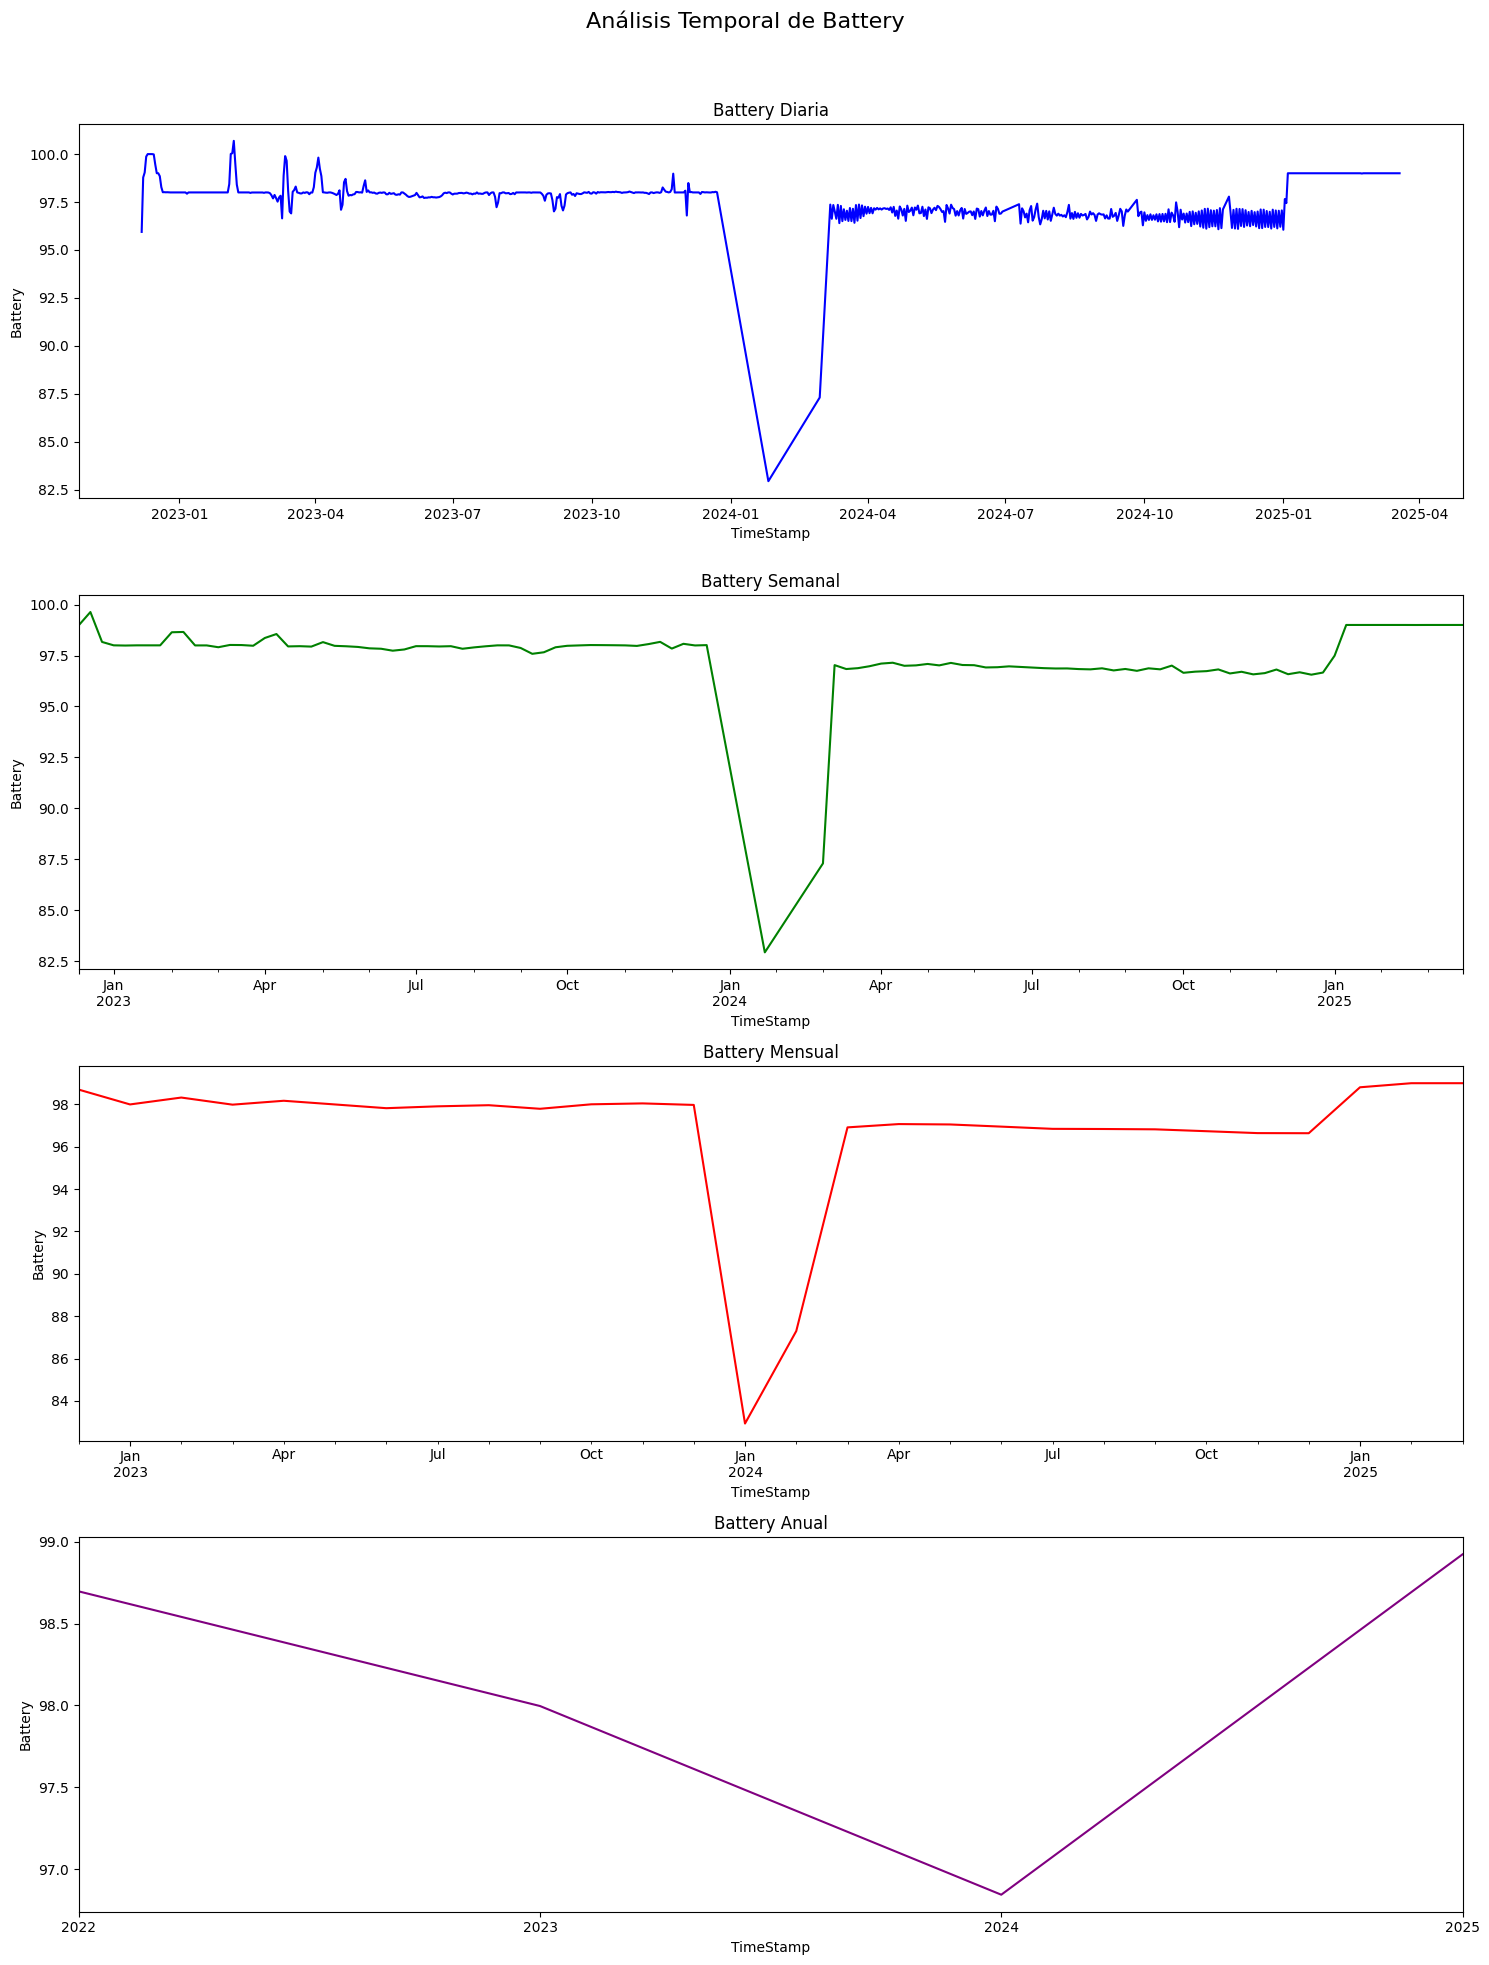

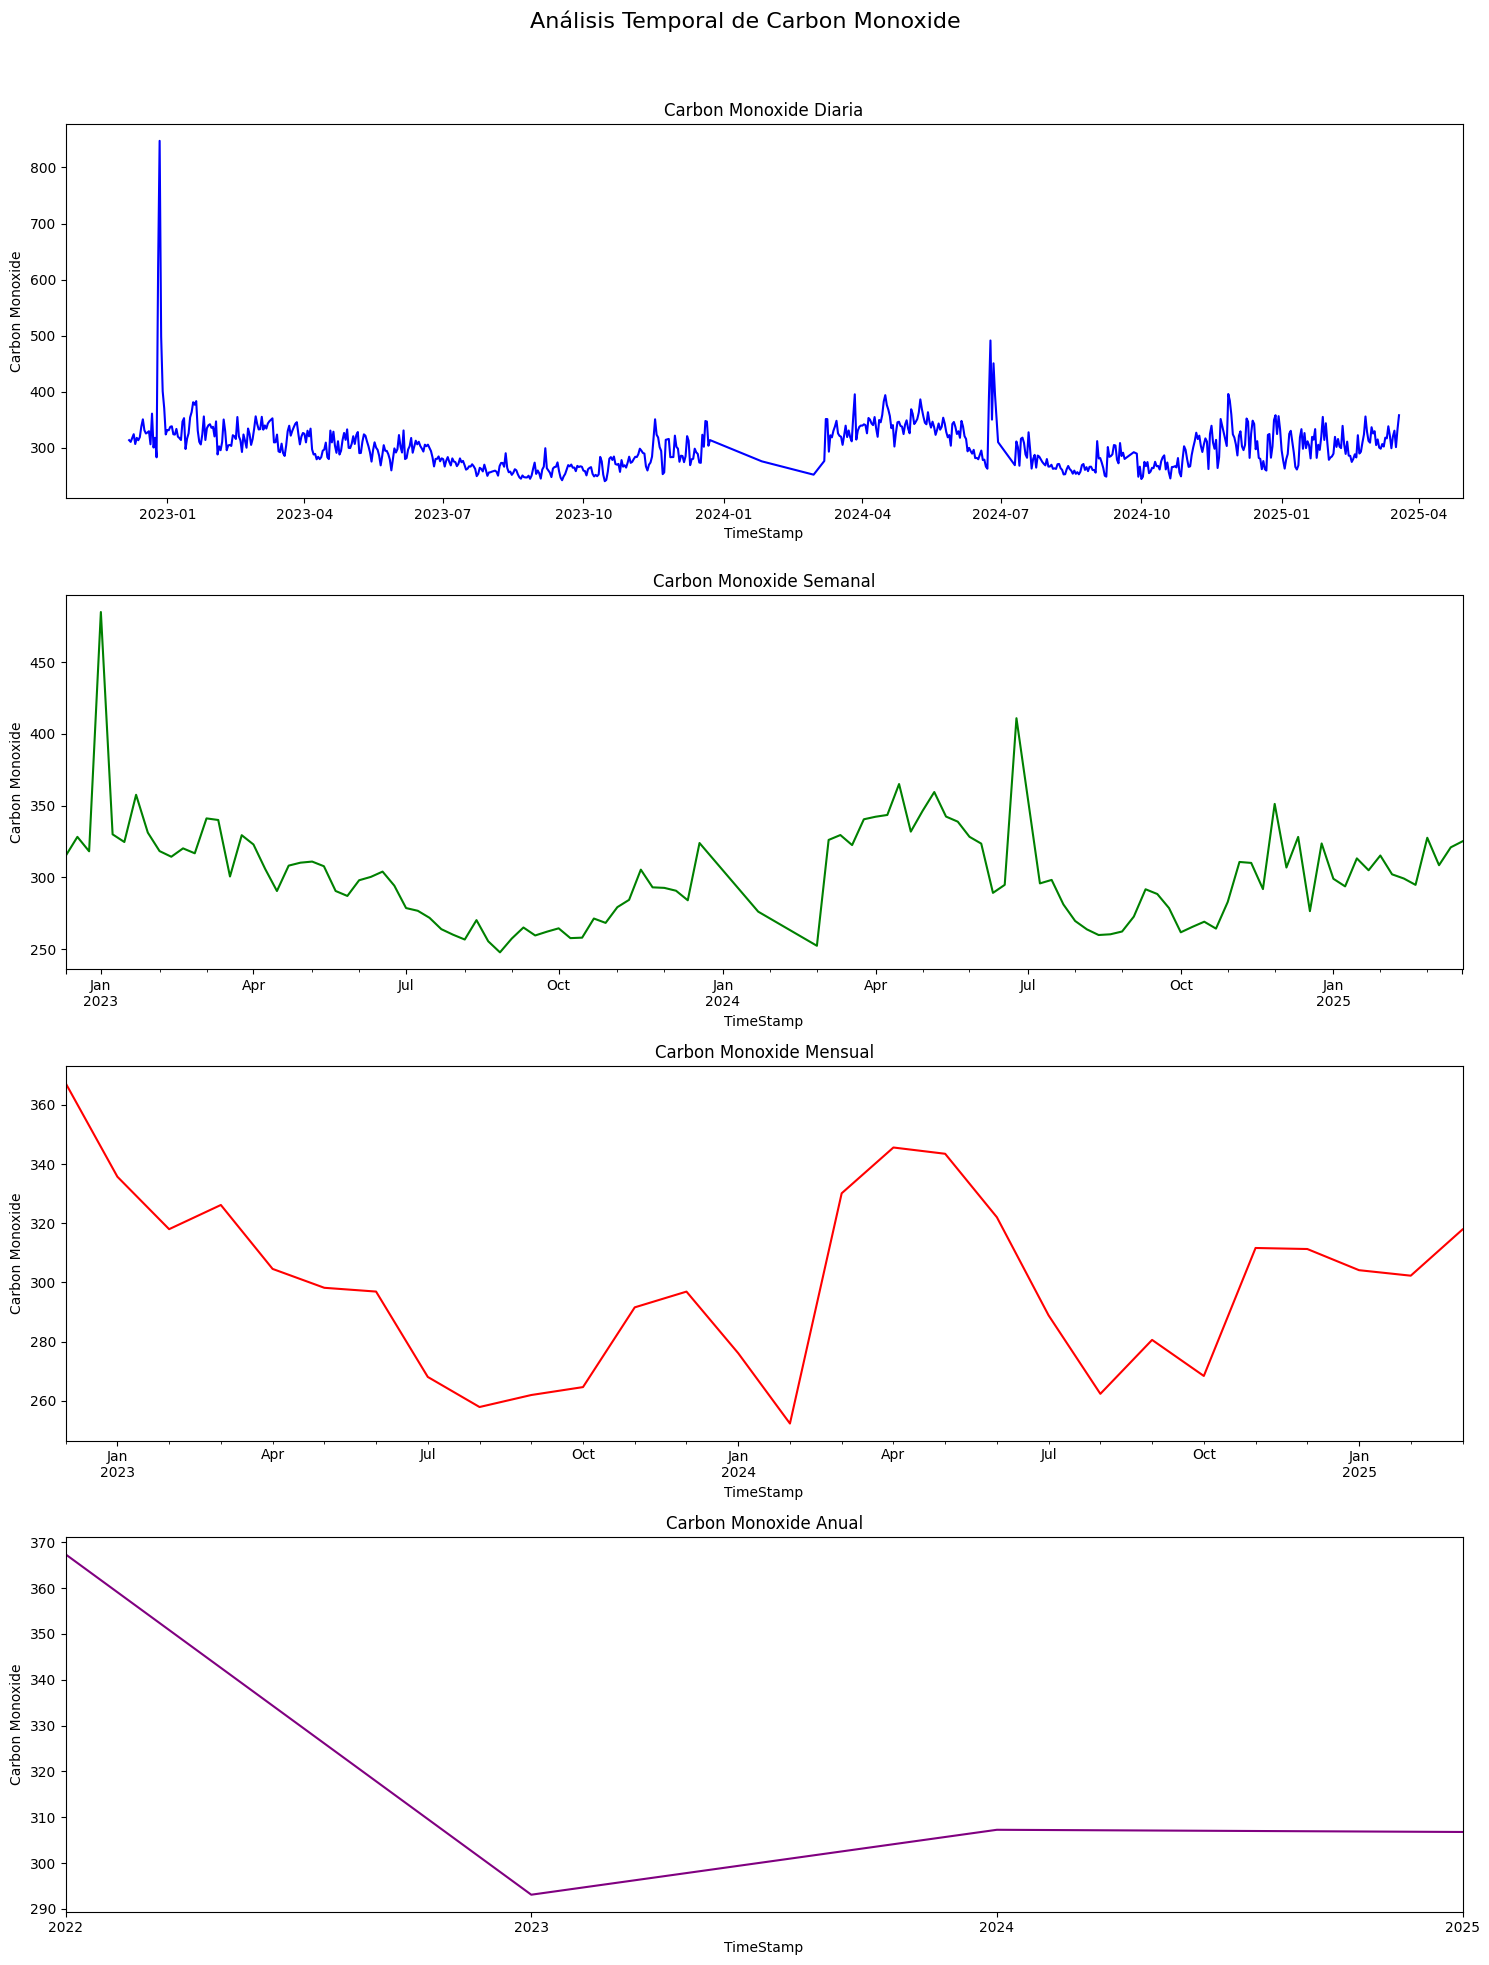

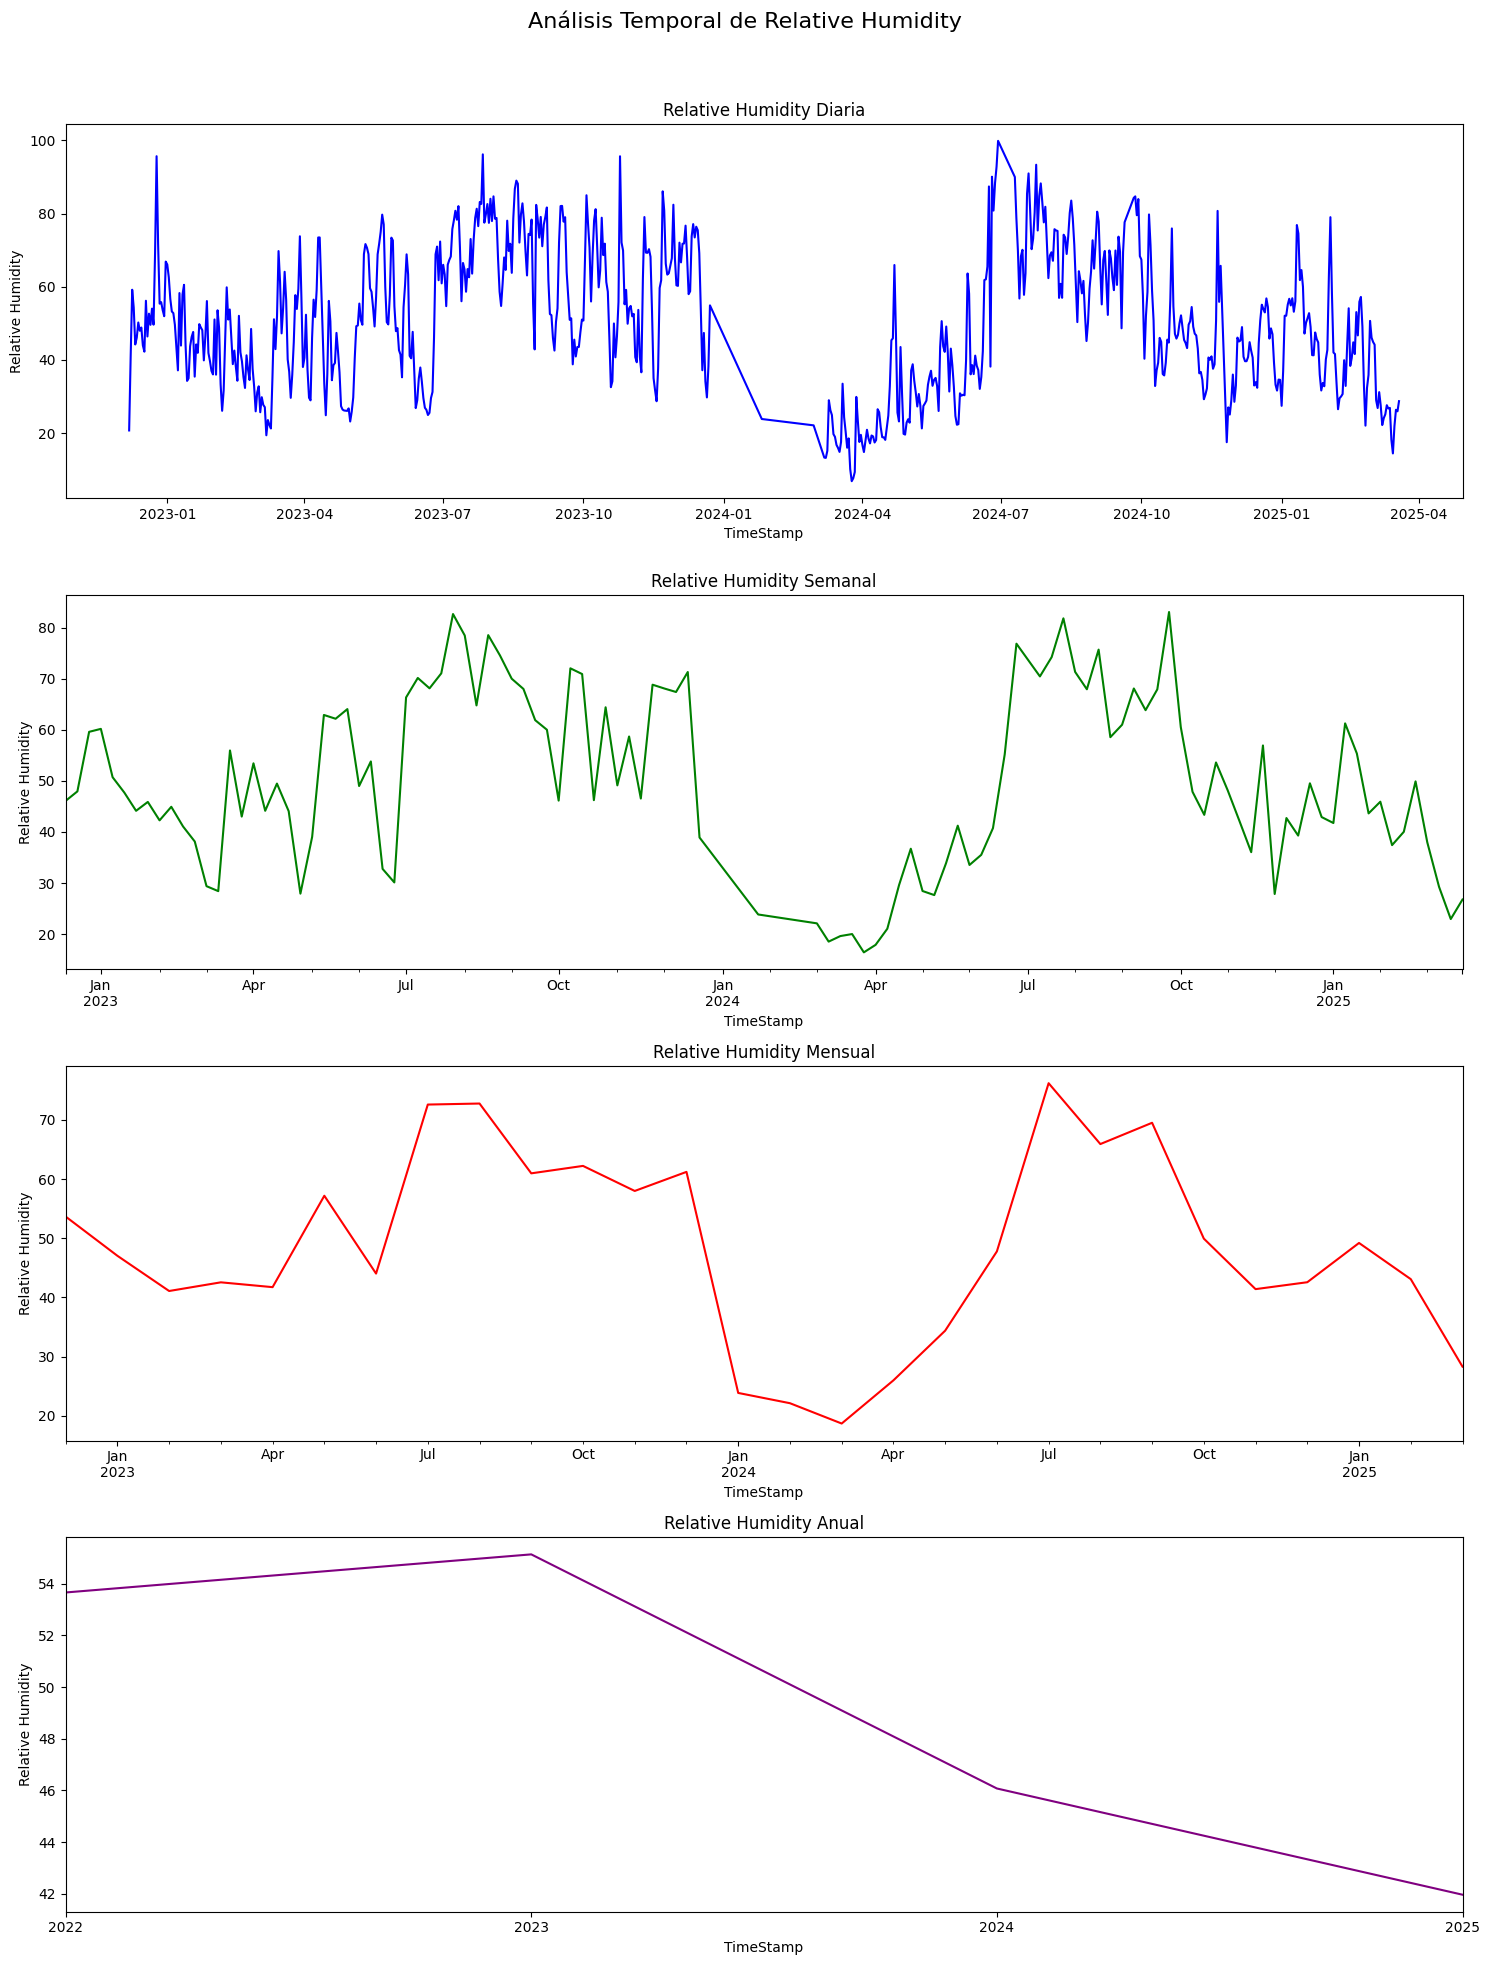

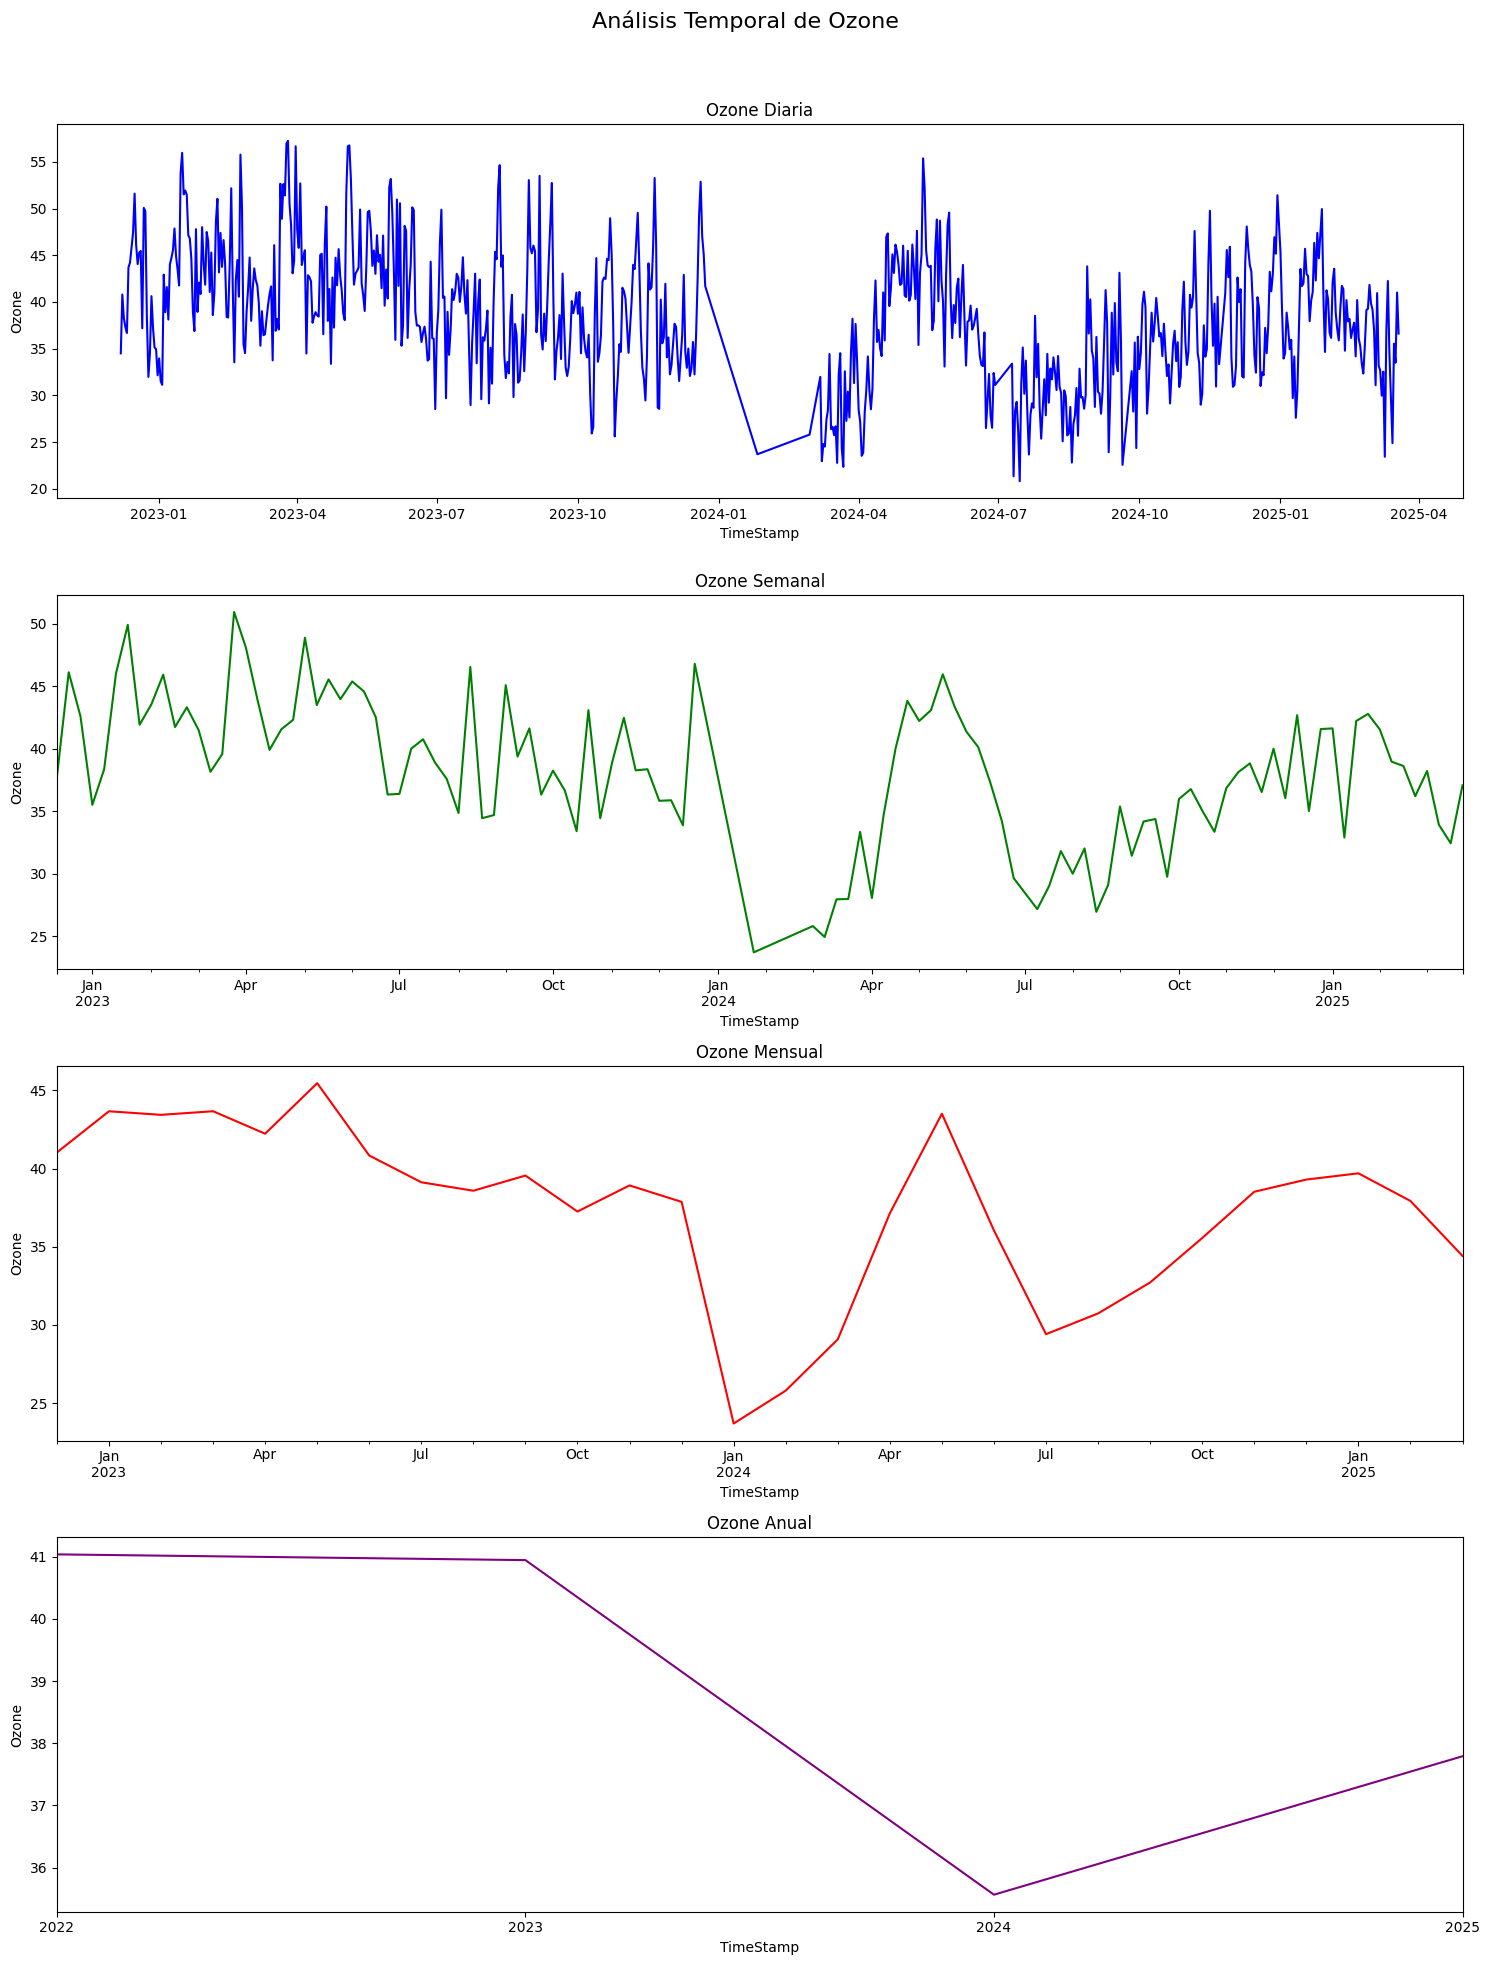

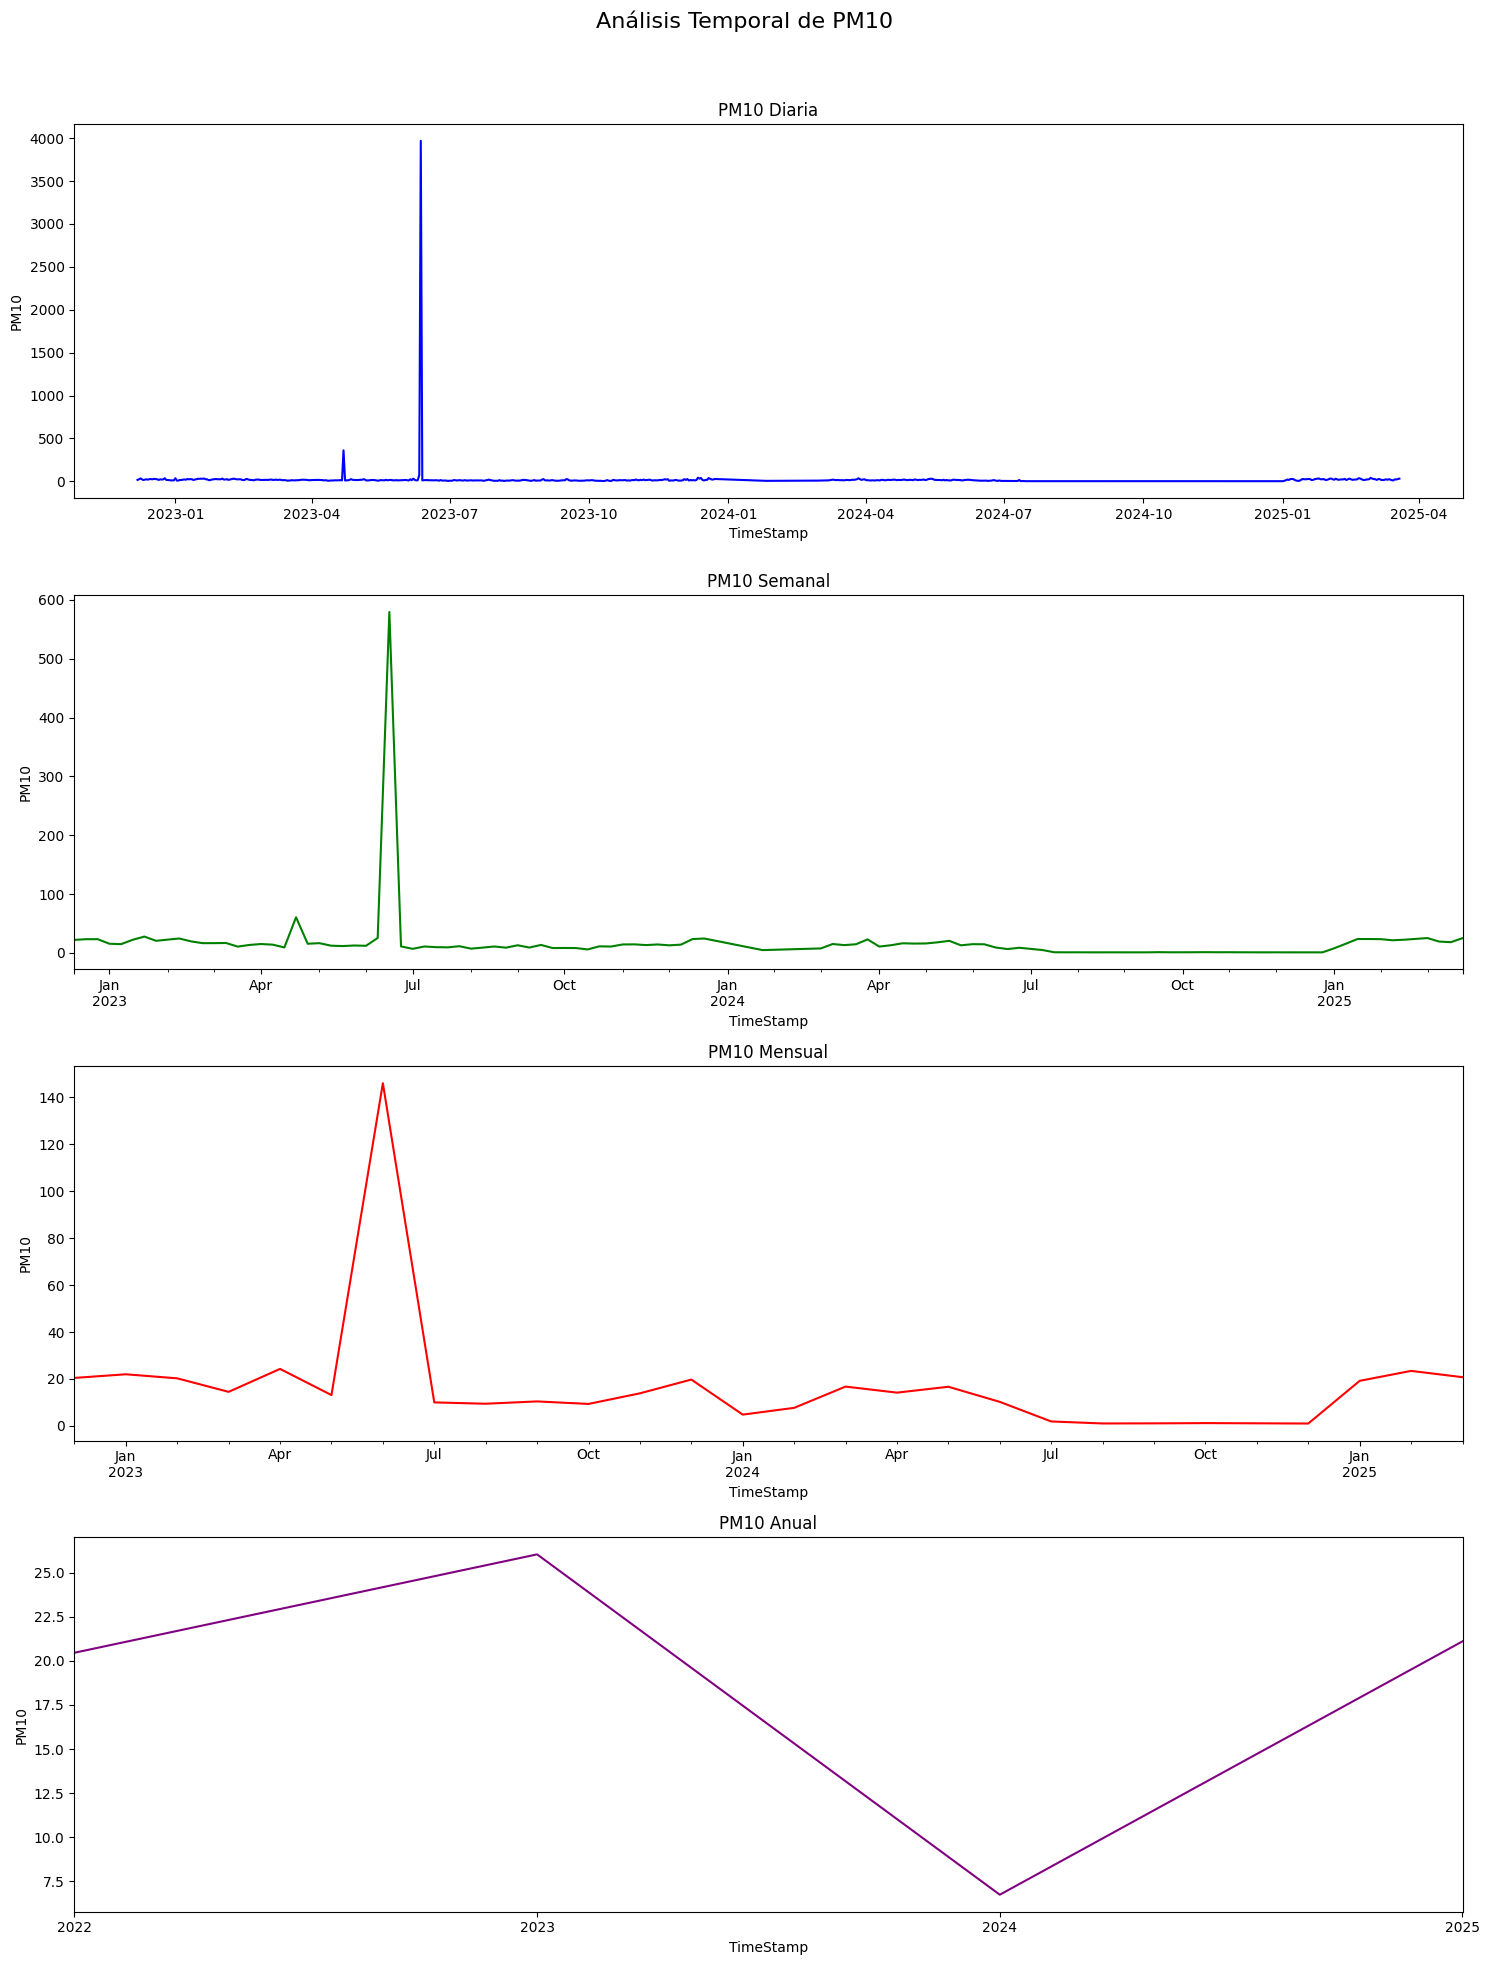

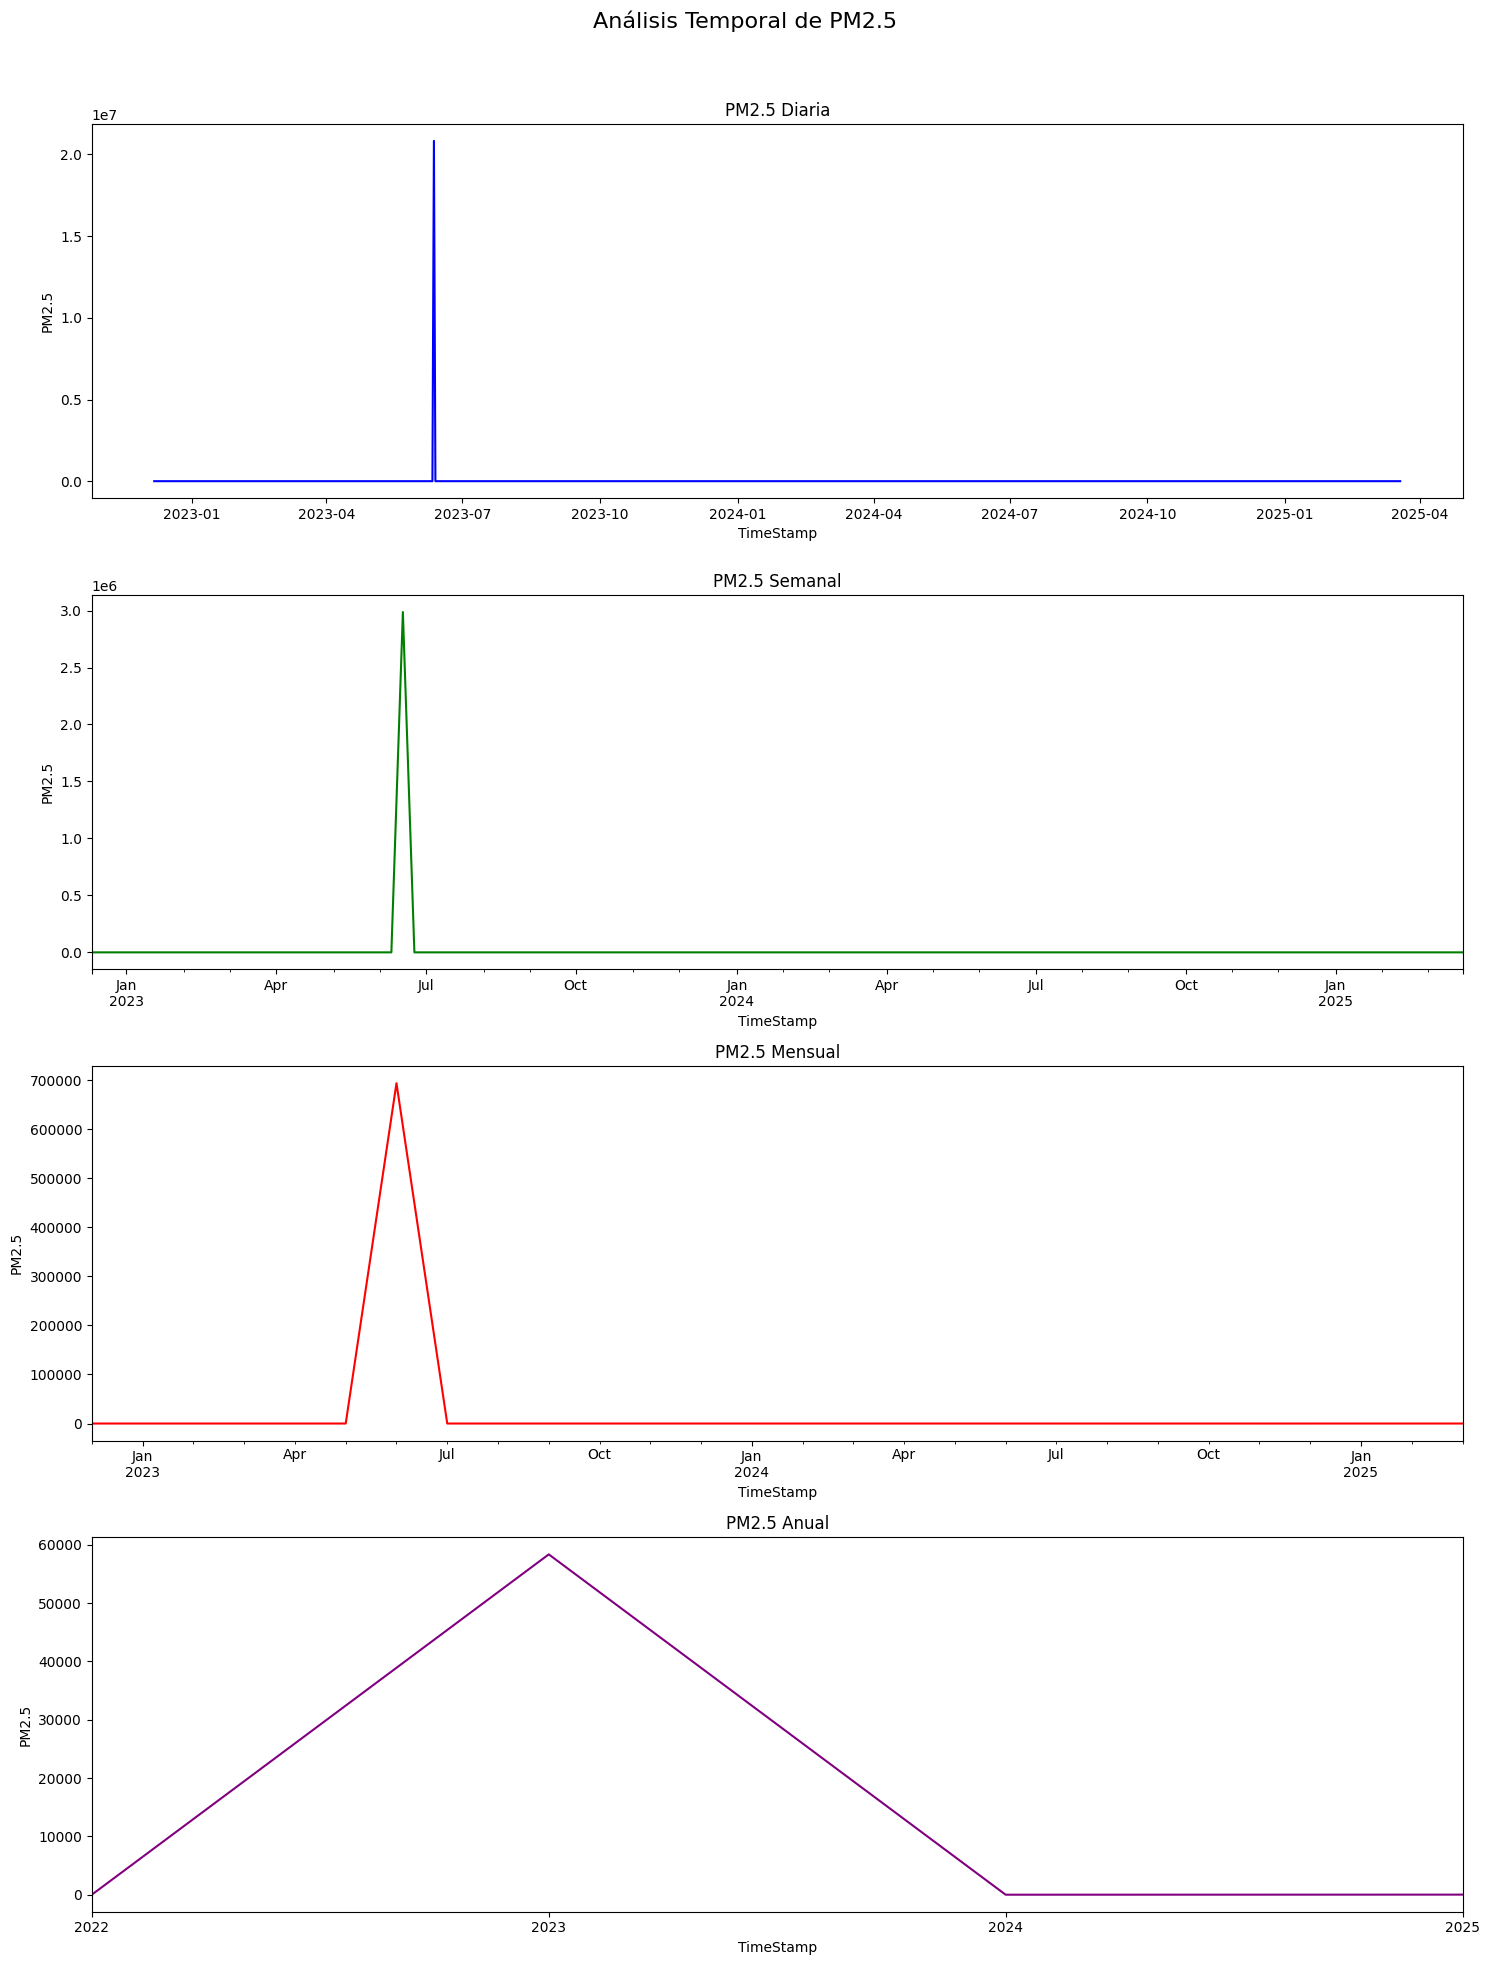

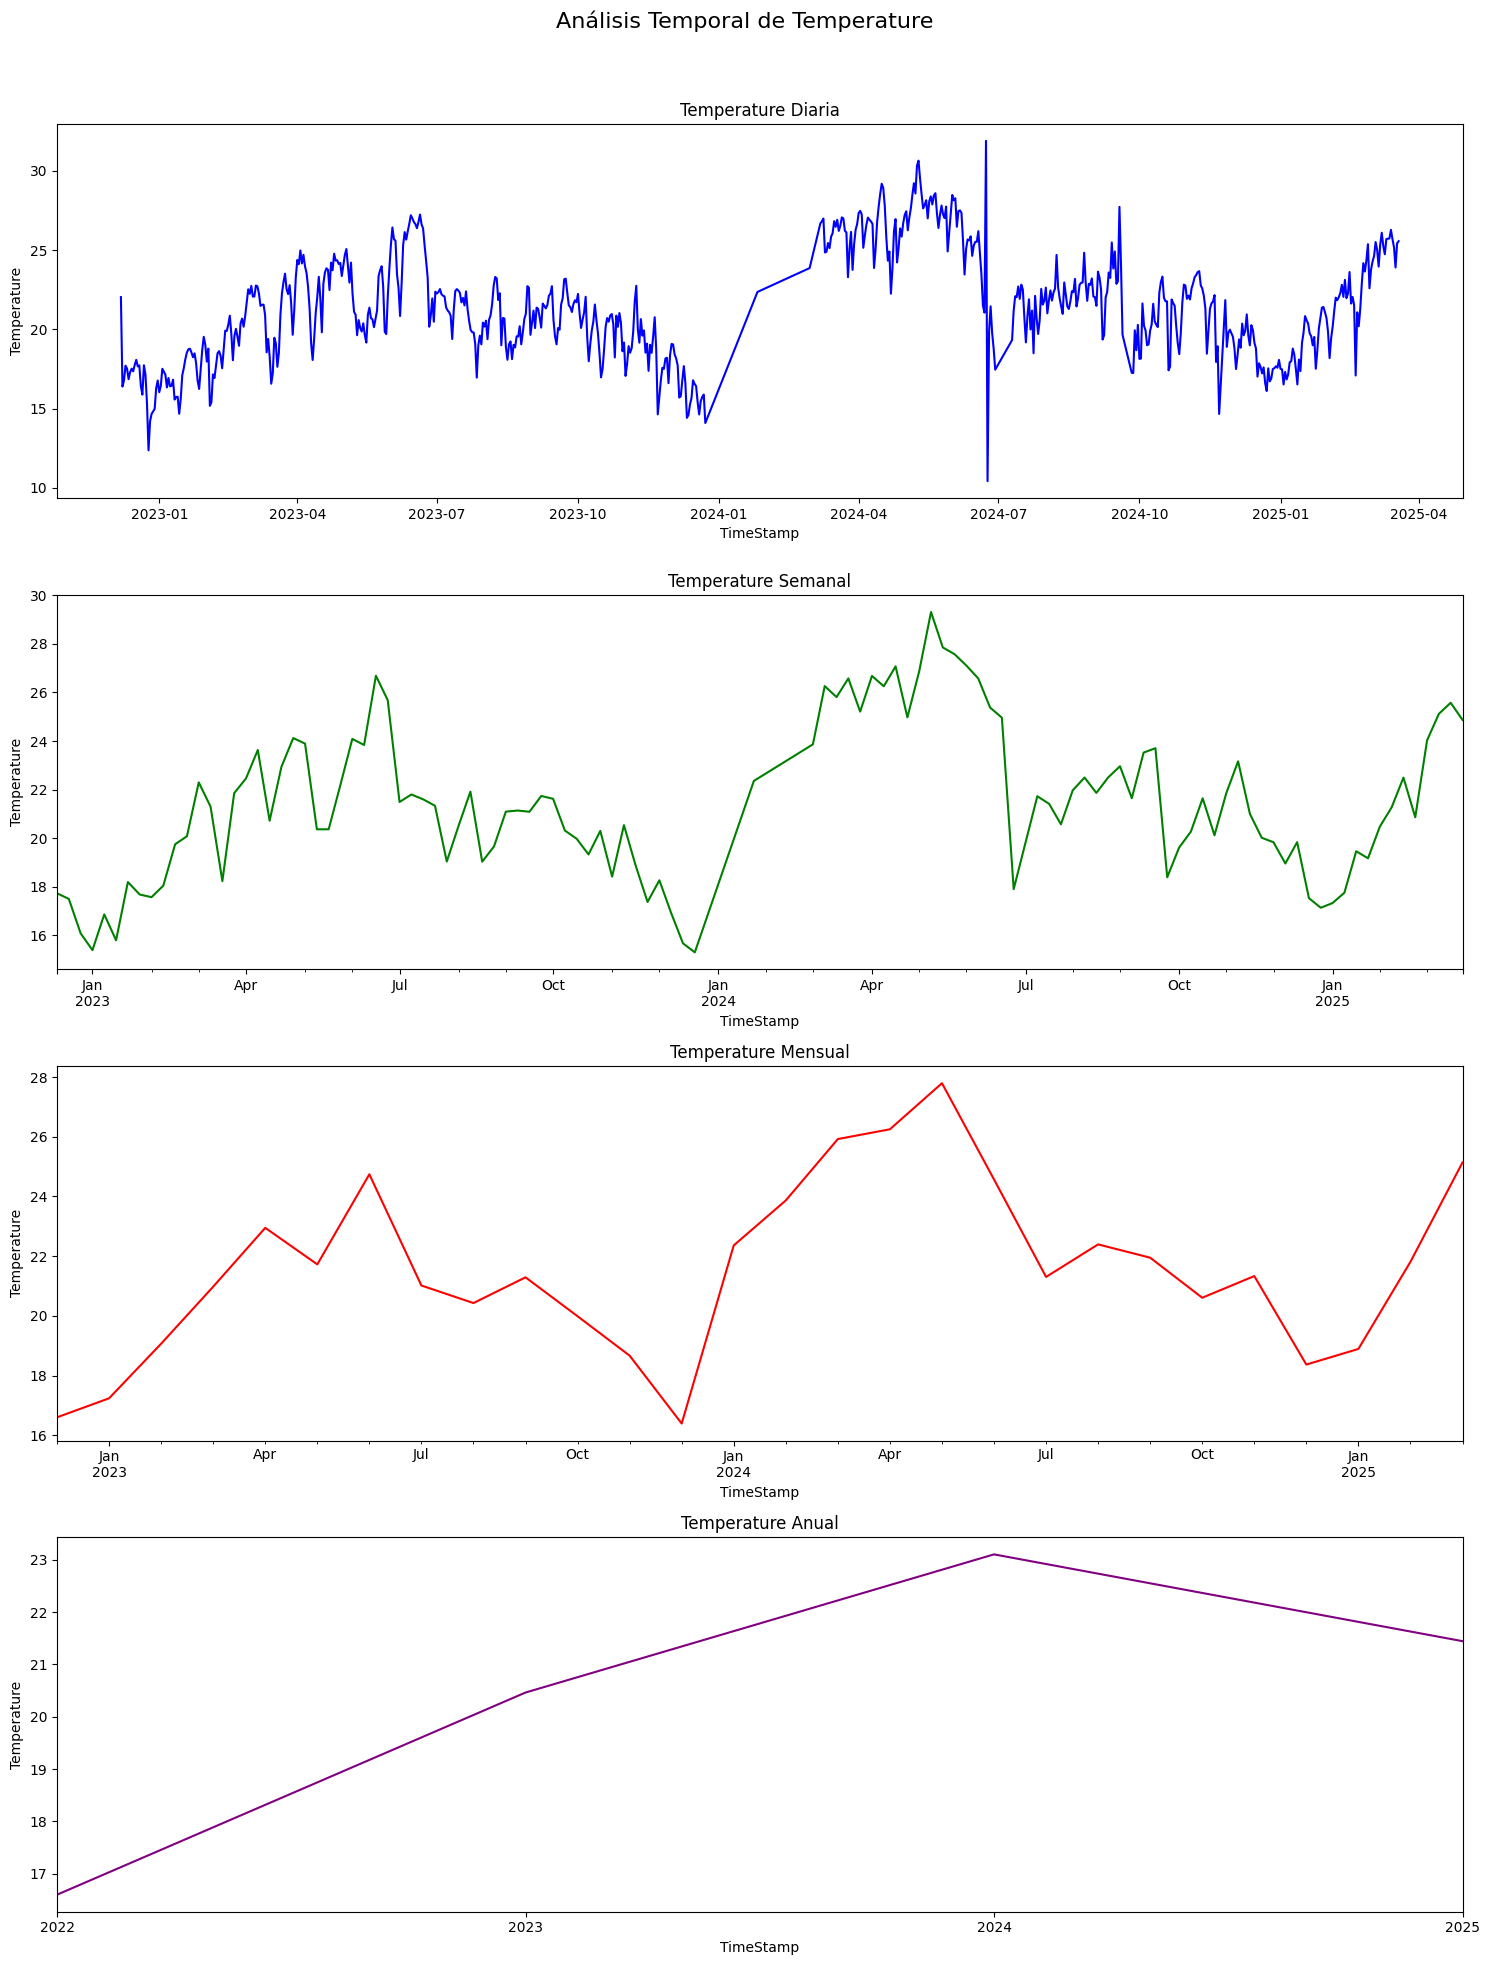

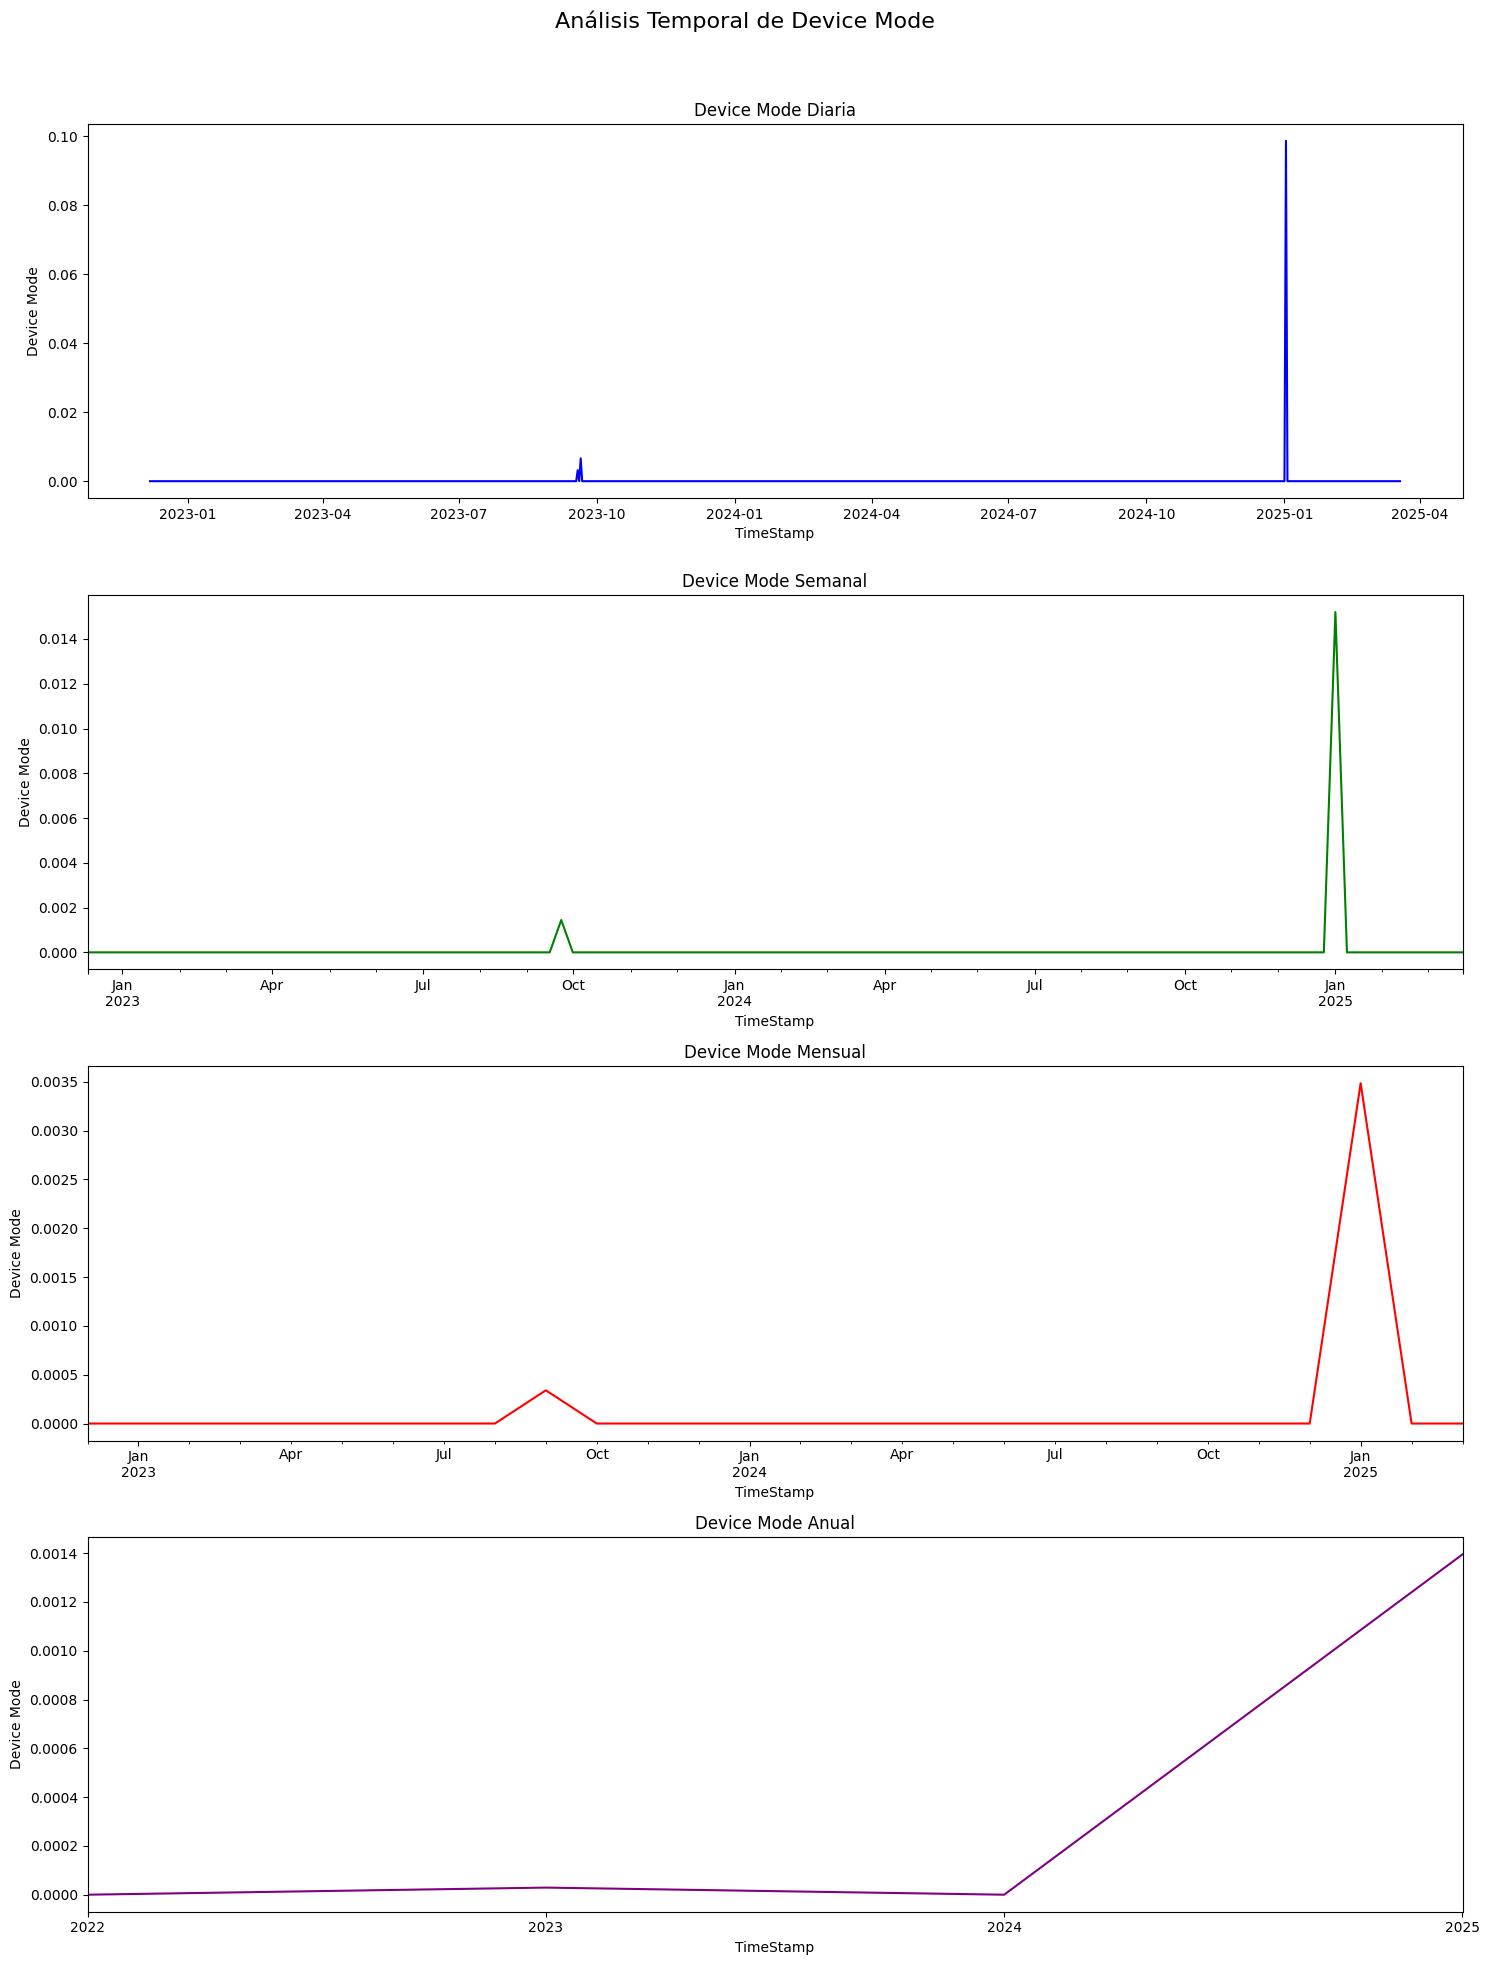

In [8]:
# Lista de columnas a analizar (excluyendo 'TimeStamp' y 'Location')
variables = ['Battery', 'Carbon Monoxide', 'Relative Humidity', 'Ozone', 'PM10', 'PM2.5', 'Temperature', 'Device Mode']

# Función para graficar una variable en diferentes escalas temporales
def plot_variable_temporal(df, variable):
    # Agrupar por día, semana, mes y año
    df_daily = df.groupby(df['TimeStamp'].dt.date)[variable].mean()
    df_weekly = df.groupby(df['TimeStamp'].dt.to_period('W'))[variable].mean()
    df_monthly = df.groupby(df['TimeStamp'].dt.to_period('M'))[variable].mean()
    df_yearly = df.groupby(df['TimeStamp'].dt.to_period('Y'))[variable].mean()

    # Crear una figura con subplots
    fig, axes = plt.subplots(4, 1, figsize=(15, 20))
    fig.suptitle(f'Análisis Temporal de {variable}', fontsize=16)

    # Gráfico diario
    df_daily.plot(ax=axes[0], title=f'{variable} Diaria', color='blue')
    axes[0].set_ylabel(variable)

    # Gráfico semanal
    df_weekly.plot(ax=axes[1], title=f'{variable} Semanal', color='green')
    axes[1].set_ylabel(variable)

    # Gráfico mensual
    df_monthly.plot(ax=axes[2], title=f'{variable} Mensual', color='red')
    axes[2].set_ylabel(variable)

    # Gráfico anual
    df_yearly.plot(ax=axes[3], title=f'{variable} Anual', color='purple')
    axes[3].set_ylabel(variable)

    plt.tight_layout(rect=[0, 0, 1, 0.96])  # Ajustar el layout para evitar superposiciones
    plt.show()

# Recorrer cada variable y generar los gráficos
for variable in variables:
    plot_variable_temporal(df, variable)

### 6. Distribuciones:
   - Histogramas de variables numéricas
   - Análisis de la forma de los datos


# 7. Análisis: Error en Datos

Hay un error en los valores iniciando el año 2024


=== Estadísticas descriptivas (1 de noviembre de 2023 - 1 de marzo de 2024) ===
            Battery  Carbon Monoxide  Relative Humidity         Ozone  \
count  13648.000000     13648.000000       13648.000000  13648.000000   
mean      97.363936       314.126978          38.896432     33.235273   
min       73.000000       116.000000           1.000000      0.000000   
25%       97.000000       276.000000          15.500000     27.000000   
50%       98.000000       296.000000          30.600000     31.000000   
75%       98.000000       336.000000          57.500000     38.000000   
max      100.000000       762.000000          99.900000    300.000000   
std        1.255087        55.641509          28.274135     12.567023   

               PM10         PM2.5   Temperature  Device Mode  \
count  13648.000000  13648.000000  13648.000000      13648.0   
mean      18.136943     16.954572     21.384247          0.0   
min        2.000000      1.000000      8.800000          0.0   
25%  

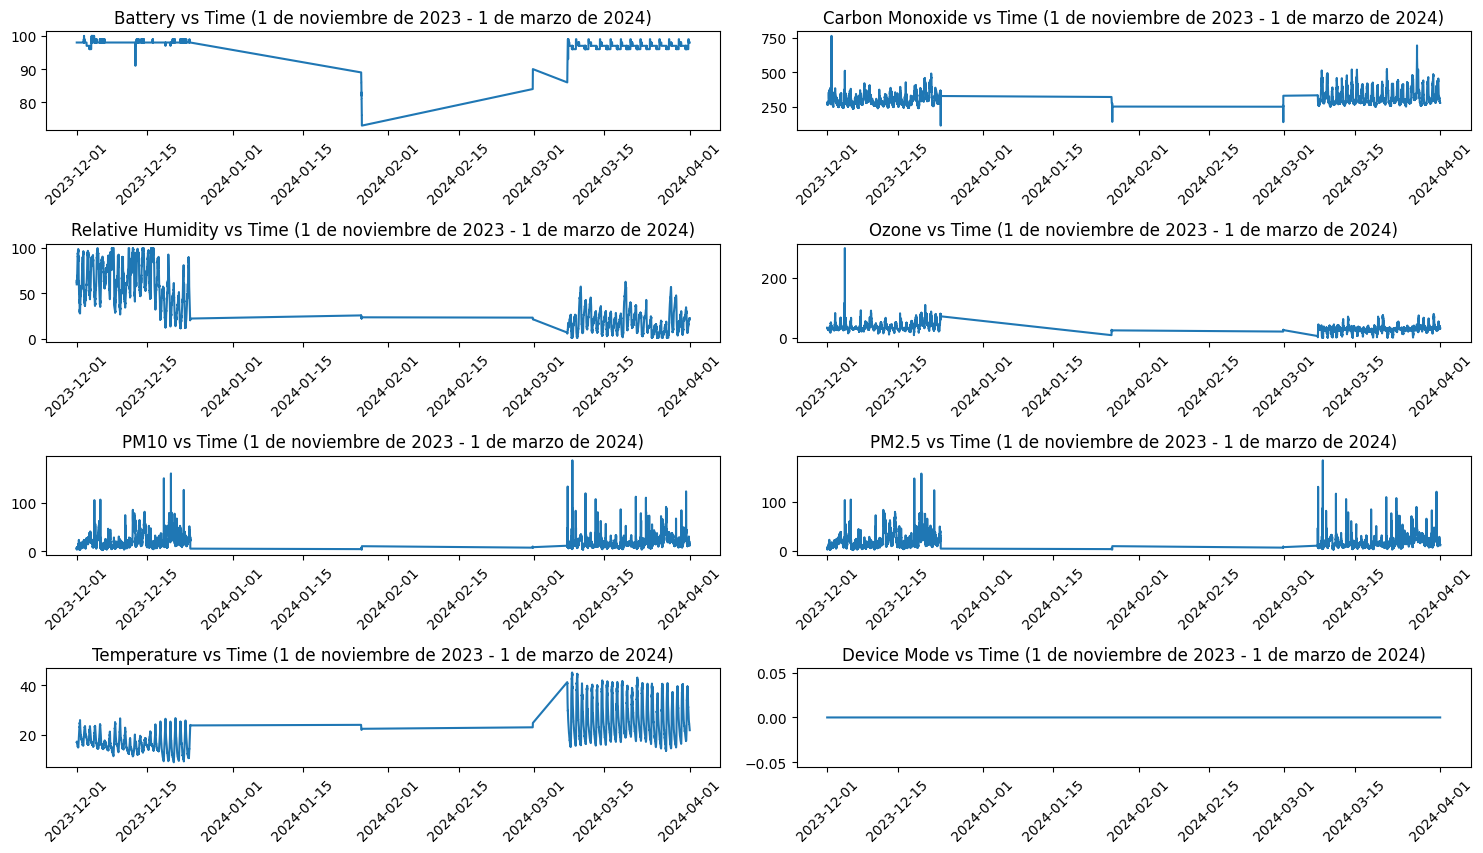

In [10]:
import numpy as np
import matplotlib.pyplot as plt

# 1. Filtrar el DataFrame por el rango de fechas
start_date = '2023-12-01'
end_date = '2024-04-01'
df_filtered = df[(df['TimeStamp'] >= start_date) & (df['TimeStamp'] <= end_date)]

# 2. Estadísticas descriptivas para el rango filtrado
print("\n=== Estadísticas descriptivas (1 de noviembre de 2023 - 1 de marzo de 2024) ===")
print(df_filtered.describe())

# 3. Análisis temporal
# Crear gráficos de series temporales para cada variable numérica
numeric_columns = df_filtered.select_dtypes(include=[np.number]).columns

plt.figure(figsize=(15, 10))
for i, col in enumerate(numeric_columns, 1):
    if col not in ['date', 'time']:  # Excluir columnas no relevantes
        plt.subplot(len(numeric_columns)//2 + 1, 2, i)
        plt.plot(df_filtered['TimeStamp'], df_filtered[col])
        plt.title(f'{col} vs Time (1 de noviembre de 2023 - 1 de marzo de 2024)')
        plt.xticks(rotation=45)
plt.tight_layout()
plt.show()